In [5]:
!pip install skimpy catboost

In [2]:
!pip install -U scikit-learn

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB 325.1 kB/s eta 0:00:34
   ---------------------------------------- 0.0/11.0 MB 326.8 kB/s eta 0:00:34
   ---------------------------------------- 0.1/11.0 MB 391.3 kB/s eta 0:00:28
   ---------------------------------------- 0.1/11.0 MB 544.7 kB/s eta 0:00:20
   ---------------------------------------- 0.1/11.0 MB 544.7 kB/s eta 0:00:20
   ---------------------------------------- 0.1/11.0 MB 544.7 kB/s eta 0:00:20
    --------------------------------------- 0.2/11.0 MB 621.6 kB/s eta 0:00:18
    --------------------------------------- 0.2/11.0 MB 621.6 kB/s eta 0:00:18
    --------------------------------------- 0.3/11.0 MB 582.4 kB/s eta 0:00:19
   - -------------------------------------- 0.3/11.0 MB 633.2 kB/s eta 0:00:17
   - -------------------------------------- 0.3/11.0 MB 655.4 kB/s eta

  You can safely remove it manually.


In [6]:
!pip install ppscore

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached pandas-1.5.3-cp311-cp311-win_amd64.whl.metadata (12 kB)
Using cached pandas-1.5.3-cp311-cp311-win_amd64.whl (10.3 MB)
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13201 sha256=026a0deb7af7d031a0f82a17a1290800869d75d3fc7dcdf0f0ec45c5829803b0
  Stored in directory: c:\users\mbugu\appdata\local\pip\cache\wheels\7e\45\08\bb444e1bca6a2bc3795707de9edd87ec1976dd8b3570fa7abf
Successfully built ppscore
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
skimpy 0.0.15 requires pandas<3.0.0,>=2.0.3, but you have pandas 1.5.3 which is incompatible.


In [6]:
#=============================================
#              Data manipulation
#=============================================
import pandas as pd
pd.set_option("display.max_columns", None)
import numpy as np

#=============================================
#              Data visualization
#=============================================
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim

#=============================================
#              Stats
#=============================================
import ppscore as pps

#=============================================
#              Data preprocessing
#=============================================
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import TargetEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

#=============================================
#              Classifiers
#=============================================
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, 
                              ExtraTreesClassifier, 
                              GradientBoostingClassifier, 
                              HistGradientBoostingClassifier)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

#=============================================
#              Metrics
#=============================================
from sklearn.metrics import (balanced_accuracy_score as bas, 
                             confusion_matrix)

#=============================================
#              Others
#=============================================
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'xgboost'

In [7]:
data = pd.read_csv(r"C:\Users\mbugu\OneDrive\Desktop\ML DATASET\Predict Online Gaming Behavior Dataset\online_gaming_behavior_dataset.csv")
data.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


In [8]:
skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 40034  │ │ int32       │ 7     │                                                          │
│ │ Number of columns │ 13     │ │ string      │ 5     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name           ┃ NA  ┃ NA %  ┃ mean   ┃ sd     ┃ p0        ┃ p25   ┃ p50   ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ PlayerID              │   0 │     0 │  29020 │  11560 │      9000 │ 19010 │ 29020 │ 39020 │ 49030 │ ▇▇▇▇▇▇ │  │
│ │ Age                   │   0 │     0 │  31.99 │  10.04 │        15 │    23 │    32 │    41 │    49 │ ▇▇▇▇▇▇ │  │
│ │ PlayTimeHours         │   0 │     0 │  12.02 │  6.915 │ 0.0001147 │ 6.068 │ 12.01 │ 17.96 │    24 │ ▇▇▇▇▇▇ │  │
│ │ InGamePurchases       │   0 │     0 │ 0.2009 │ 0.4006 │         0 │     0 │     0 │     0 │     1 │ ▇    ▂ │  │
│ │ SessionsPerWeek       │   0 │     0 │  9.472 │  5.764 │         0 │     4 │     9 │    14 │    19 │ ▇▆▆▆▆▇ │  │
│ │ AvgSessionDurationMin │   0 │     0 │  94.79 │  49.01 │        10 │    52 │    95 │   137 │   179 │ ▇▇▇▇▇▇ │  │
│ │ utes                  │     │       │        │        │           │       │       │       │       │        │  │
│ │ PlayerLevel           │   0 │     0 │  49.66 │  28.59 │         1 │    25 │    49 │    74 │    99 │ ▇▇▇▇▇▇ │  │
│ │ AchievementsUnlocked  │   0 │     0 │  24.53 │  14.43 │         0 │    12 │    25 │    37 │    49 │ ▇▇▇▇▇▇ │  │
│ └───────────────────────┴─────┴───────┴────────┴────────┴───────────┴───────┴───────┴───────┴───────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                     ┃ NA     ┃ NA %       ┃ words per row              ┃ total words           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Gender                          │      0 │          0 │                          1 │                 40034 │  │
│ │ Location                        │      0 │          0 │                          1 │                 40034 │  │
│ │ GameGenre                       │      0 │          0 │                          1 │                 40034 │  │
│ │ GameDifficulty                  │      0 │          0 │                          1 │                 40034 │  │
│ │ EngagementLevel                 │      0 │          0 │                          1 │                 40034 │  │
│ └─────────────────────────────────┴────────┴────────────┴────────────────────────────┴───────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [9]:
# Checking duplicate rows
print(f"Total duplicate rows: {data.duplicated().sum()}")

Total duplicate rows: 0


In [10]:
discrete_variables = ['Age', 'SessionsPerWeek', 'AvgSessionDurationMinutes', 'AchievementsUnlocked']
continuous_variable = ['PlayTimeHours']
nominal_variables = ['Gender', 'Location', 'GameGenre', 'InGamePurchases', 'GameDifficulty']
ordinal_variables = ['PlayerLevel', 'EngagementLevel']

In [11]:
data_eda = data.copy()
data_eda = data_eda.drop(columns = ['PlayerID'])
data_eda.head()

,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


C:\Users\mbugu\AppData\Local\Temp\ipykernel_11856\1443886858.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


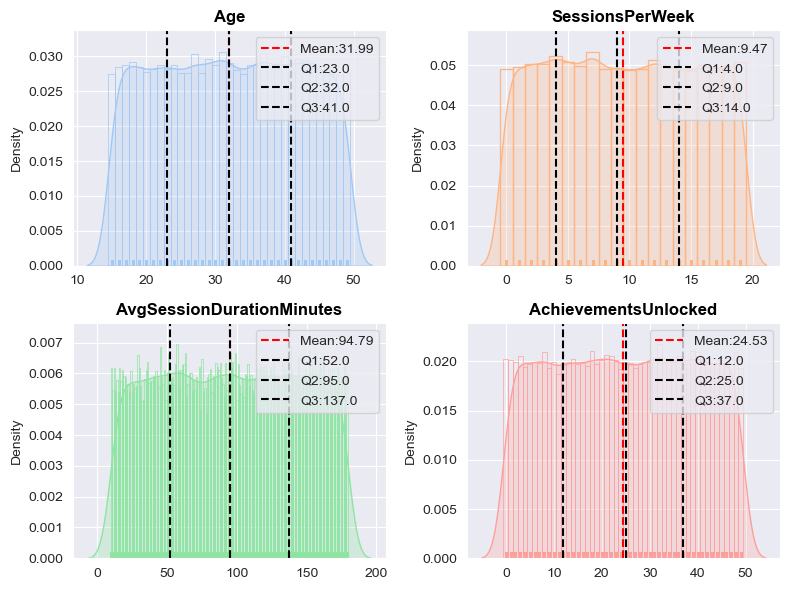

In [12]:
sns.set_style("darkgrid")
colors = sns.color_palette(palette = 'pastel', n_colors = len(discrete_variables))

fig,ax = plt.subplots(nrows = 2, ncols = 2, figsize = (8, 6))
ax = ax.flat
for i,col in enumerate(discrete_variables):
    
    mu = data[col].mean()
    q1, q2, q3 = data[col].quantile([0.25, 0.5, 0.75])
    sns.histplot(data, x = col, stat = 'density', fill = False, discrete = True, color = colors[i], ax = ax[i])
    sns.kdeplot(data, x = col, color = colors[i], fill = True, ax = ax[i])
    sns.rugplot(data, x = col, color = colors[i], ax = ax[i])
    ax[i].axvline(mu, linestyle = '--', color = 'r', label = f"Mean:{mu:.2f}")
    ax[i].axvline(q1, linestyle = '--', color = 'black', label = f"Q1:{q1}")
    ax[i].axvline(q2, linestyle = '--', color = 'black', label = f"Q2:{q2}")
    ax[i].axvline(q3, linestyle = '--', color = 'black', label = f"Q3:{q3}")
    ax[i].legend()
    ax[i].set_xlabel("")
    ax[i].set_title(f"{col}",fontweight = 'bold', color = 'black')
    
fig.tight_layout()
fig.show()

C:\Users\mbugu\AppData\Local\Temp\ipykernel_11856\1782564202.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


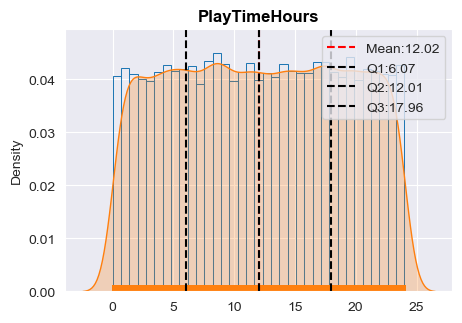

In [13]:
fig,ax = plt.subplots(figsize = (5, 3.4))
mu = data[continuous_variable[0]].mean()
q1, q2, q3 = data[continuous_variable[0]].quantile([0.25, 0.5, 0.75])
sns.histplot(data, x = continuous_variable[0], stat = 'density', fill = False, ax = ax)
sns.kdeplot(data, x = continuous_variable[0], fill = True, ax = ax)
sns.rugplot(data, x = continuous_variable[0], ax = ax)
ax.axvline(mu, linestyle = '--', color = 'r', label = f"Mean:{mu:.2f}")
ax.axvline(q1, linestyle = '--', color = 'black', label = f"Q1:{q1:.2f}")
ax.axvline(q2, linestyle = '--', color = 'black', label = f"Q2:{q2:.2f}")
ax.axvline(q3, linestyle = '--', color = 'black', label = f"Q3:{q3:.2f}")
ax.legend()
ax.set_xlabel("")
ax.set_title(f"{continuous_variable[0]}", fontweight = 'bold', color = 'black')  
fig.show()

NameError: name 'Counter' is not defined

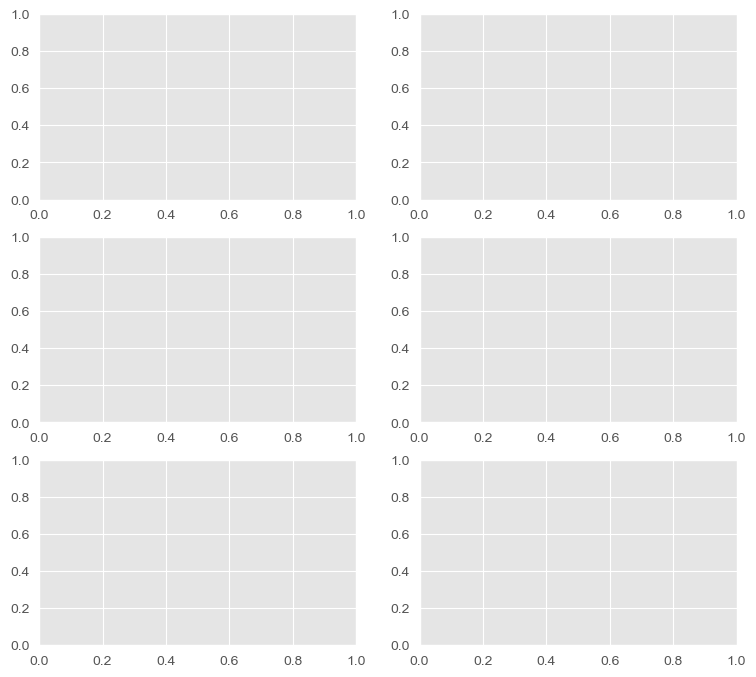

In [14]:
plt.style.use("ggplot")
fig,ax = plt.subplots(3, 2, figsize = (9, 8.2))
ax = ax.flat

for i,col in enumerate(nominal_variables):
    ax[i].pie(x = list(Counter(data[col]).values()), 
            labels = list(Counter(data[col]).keys()), 
            autopct = "%.1f%%", 
            shadow = True)
    ax[i].set_title(f"{col}", fontsize = 12, fontweight = "bold")
    
fig.delaxes(ax[5])
fig.tight_layout()
fig.show()

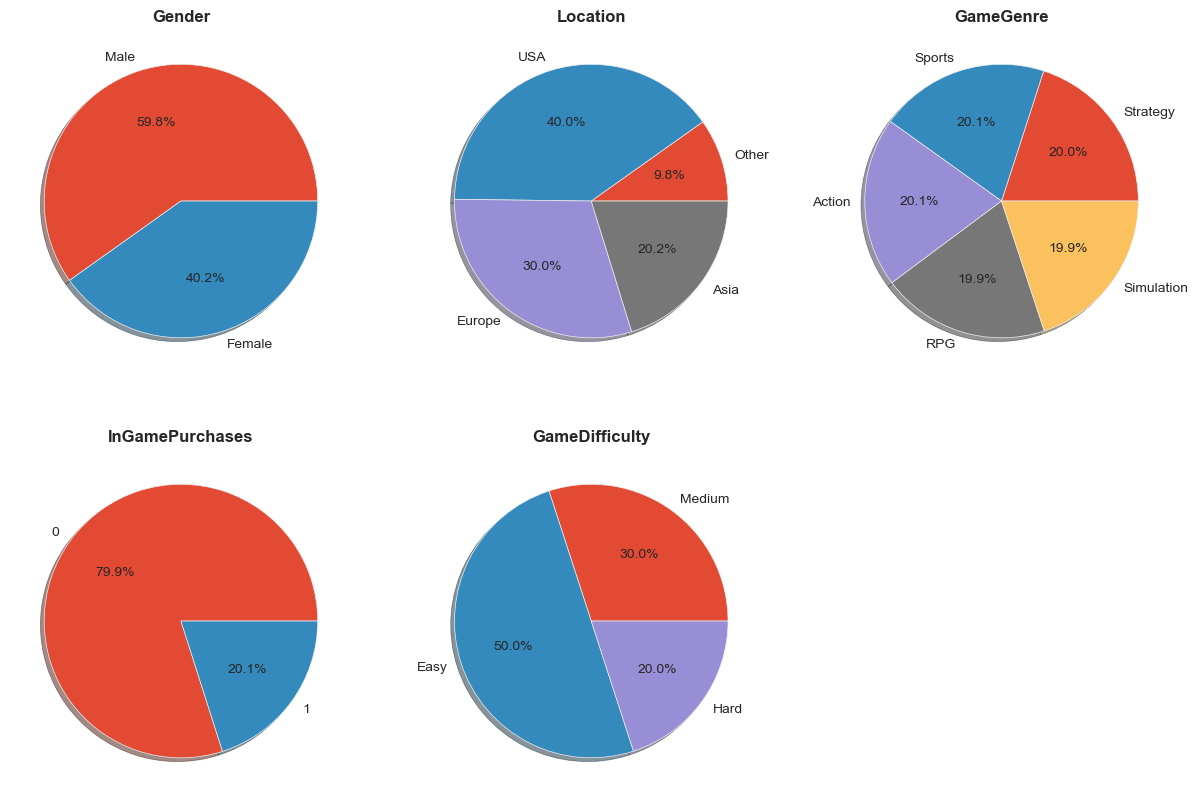

In [16]:
from collections import Counter
import matplotlib.pyplot as plt

# Assuming nominal_variables and data are defined
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
ax = ax.flat

for i, col in enumerate(nominal_variables):
    ax[i].pie(x=list(Counter(data[col]).values()), 
              labels=list(Counter(data[col]).keys()), 
              autopct="%.1f%%", 
              shadow=True)
    ax[i].set_title(f"{col}", fontsize=12, fontweight="bold")

fig.delaxes(ax[5])
plt.show()


In [15]:
plt.figure(figsize = (5, 3.3))
plt.pie(x = Counter(data[ordinal_variables[1]]).values(), 
        labels = Counter(data[ordinal_variables[1]]).keys(), 
        autopct = "%.1f%%", 
        shadow = True)
plt.title(f"{ordinal_variables[1]}", fontsize = 12, fontweight = "bold")
plt.show()

NameError: name 'Counter' is not defined

<Figure size 500x330 with 0 Axes>

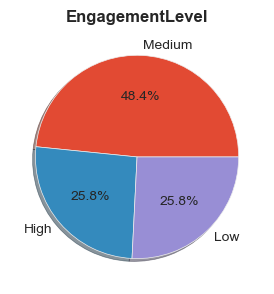

In [17]:
from collections import Counter
import matplotlib.pyplot as plt

# Assuming ordinal_variables and data are defined
plt.figure(figsize=(5, 3.3))
plt.pie(x=Counter(data[ordinal_variables[1]]).values(), 
        labels=Counter(data[ordinal_variables[1]]).keys(), 
        autopct="%.1f%%", 
        shadow=True)
plt.title(f"{ordinal_variables[1]}", fontsize=12, fontweight="bold")
plt.show()


C:\Users\mbugu\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)
C:\Users\mbugu\AppData\Local\Temp\ipykernel_11856\1987689479.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


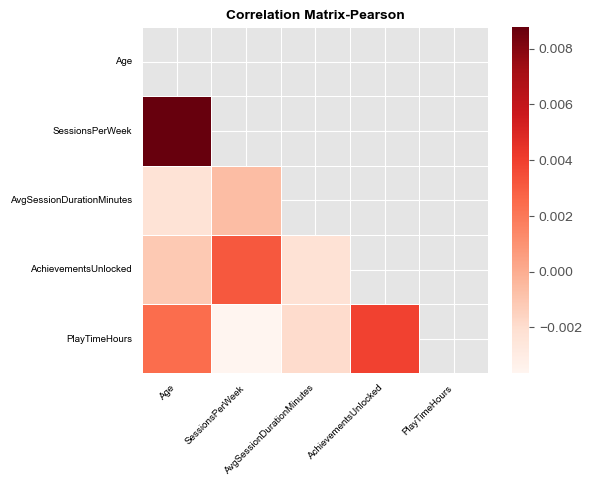

In [18]:
corr_matrix_pearson = data[discrete_variables + continuous_variable].corr(method = 'pearson')
mask = np.triu(np.ones_like(corr_matrix_pearson, dtype = bool))

fig,ax = plt.subplots(figsize = (6, 4.5))
sns.heatmap(corr_matrix_pearson, 
            annot = True, 
            annot_kws = {'fontsize':5.5, 'fontweight':'bold'},
            fmt = '.3f',
            linewidths = 0.6,
            cmap = 'Reds', 
            mask = mask, 
            square = True,
            ax = ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
ax.tick_params(labelsize = 7, labelcolor = 'black')
ax.set_title("Correlation Matrix-Pearson", fontsize = 10, fontweight = 'bold', color = 'black')
fig.show()

C:\Users\mbugu\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


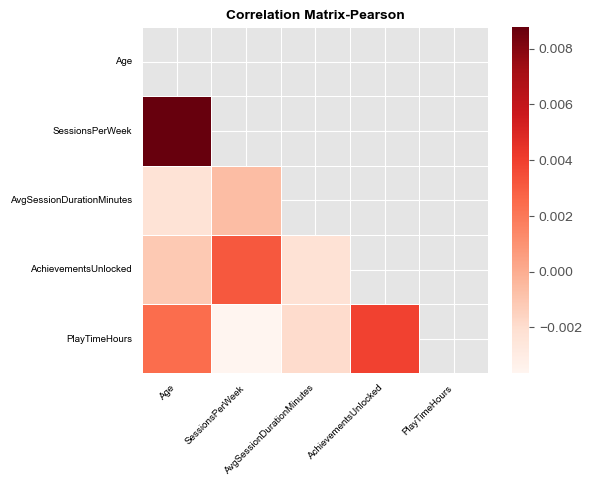

In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming discrete_variables, continuous_variable, and data are defined
corr_matrix_pearson = data[discrete_variables + continuous_variable].corr(method='pearson')
mask = np.triu(np.ones_like(corr_matrix_pearson, dtype=bool))

fig, ax = plt.subplots(figsize=(6, 4.5))
sns.heatmap(corr_matrix_pearson, 
            annot=True, 
            annot_kws={'fontsize': 5.5, 'fontweight': 'bold'},
            fmt='.3f',
            linewidths=0.6,
            cmap='Reds', 
            mask=mask, 
            square=True,
            ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.tick_params(labelsize=7, labelcolor='black')
ax.set_title("Correlation Matrix-Pearson", fontsize=10, fontweight='bold', color='black')

# Use plt.show() to display the figure
plt.show()


C:\Users\mbugu\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


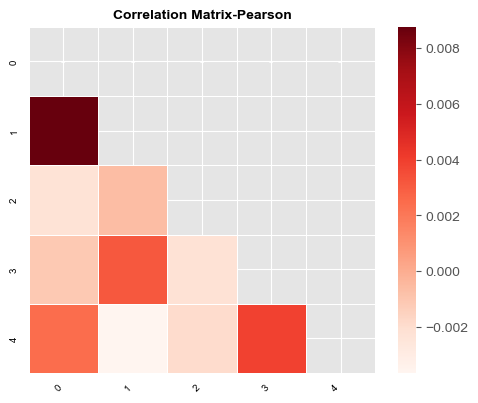

In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming discrete_variables, continuous_variable, and data are defined
# Example dummy data and variables
# data = pd.DataFrame({
#     'discrete_var1': [1, 2, 3, 4, 5],
#     'discrete_var2': [2, 3, 4, 5, 6],
#     'continuous_var1': [5.0, 6.5, 7.8, 8.1, 9.4]
# })
# discrete_variables = ['discrete_var1', 'discrete_var2']
# continuous_variable = ['continuous_var1']

# Calculate the Pearson correlation matrix
corr_matrix_pearson = data[discrete_variables + continuous_variable].corr(method='pearson')

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix_pearson, dtype=bool))

# Mask the upper triangle by setting its values to NaN
masked_corr_matrix = np.ma.masked_where(mask, corr_matrix_pearson).filled(np.nan)

fig, ax = plt.subplots(figsize=(6, 4.5))
sns.heatmap(masked_corr_matrix, 
            annot=True, 
            annot_kws={'fontsize': 5.5, 'fontweight': 'bold'},
            fmt='.3f',
            linewidths=0.6,
            cmap='Reds', 
            square=True,
            ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.tick_params(labelsize=7, labelcolor='black')
ax.set_title("Correlation Matrix-Pearson", fontsize=10, fontweight='bold', color='black')

# Use plt.show() to display the figure
plt.show()


C:\Users\mbugu\AppData\Local\Temp\ipykernel_11856\3092969298.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


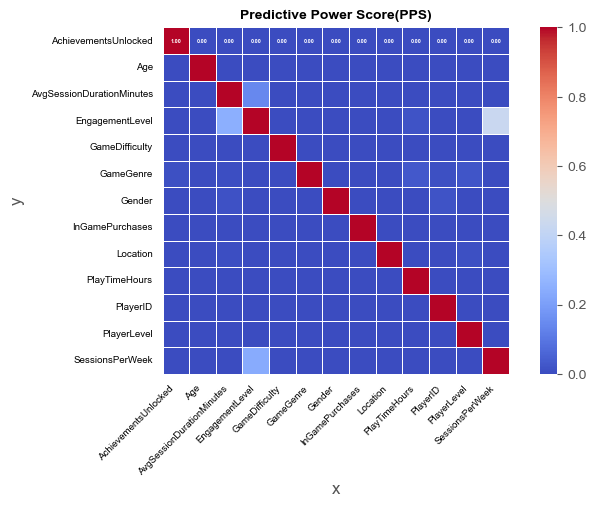

In [21]:
corr_matrix_pps = pps.matrix(data)
corr_matrix_pps = corr_matrix_pps[['x','y','ppscore']].pivot_table(values = 'ppscore', 
                                                                   index = 'y', 
                                                                   columns = 'x')


fig,ax = plt.subplots(figsize = (8, 4.5))
sns.heatmap(corr_matrix_pps, 
            annot = True, 
            annot_kws = {'fontsize':4.0, 'fontweight':'bold'},
            fmt = '.2f',
            linewidths = 0.6,
            cmap = 'coolwarm', 
            square = True,
            ax = ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
ax.tick_params(labelsize = 7, labelcolor = 'black')
ax.set_title("Predictive Power Score(PPS)", fontsize = 10, fontweight = 'bold', color = 'black')
fig.show()

In [22]:
#Data preprocessing
data = data.drop('PlayerID', axis = 1)
data.head()

,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


In [23]:
X = data.drop(columns = ['EngagementLevel'])
y = data['EngagementLevel']

SEED = 1234
TEST_SIZE = 0.3

X_train, X_test, y_train, y_test = tts(X, 
                                       y, 
                                       test_size = TEST_SIZE, 
                                       random_state = SEED, 
                                       stratify = y)

print(f"X_train: {len(y_train)} samples")
print(f"X_test: {len(y_test)} samples")

X_train: 28023 samples
X_test: 12011 samples


In [24]:
print(Counter(y_train))
print(Counter(y_test))

Counter({'Medium': 13561, 'High': 7235, 'Low': 7227})
Counter({'Medium': 5813, 'High': 3101, 'Low': 3097})


In [25]:
le = LabelEncoder()
y_train_encoder = le.fit_transform(y_train)
y_test_encoder = le.transform(y_test)

print(Counter(y_train_encoder))
print(Counter(y_test_encoder))

Counter({2: 13561, 0: 7235, 1: 7227})
Counter({2: 5813, 0: 3101, 1: 3097})


In [27]:
categorical_features = ['Gender', 'Location', 'GameGenre', 'GameDifficulty']
numerical_features = discrete_variables + continuous_variable

In [28]:
te = TargetEncoder(random_state = SEED)

transformers = [('te', te, categorical_features)]

preprocessor = ColumnTransformer(transformers, 
                                 remainder = 'passthrough', 
                                 verbose_feature_names_out = False)
preprocessor.set_output(transform = 'pandas')

X_train_prep = preprocessor.fit_transform(X_train, y_train)
X_test_prep = preprocessor.transform(X_test)
X_train_prep.head()

,Gender_High,Gender_Low,Gender_Medium,Location_High,Location_Low,Location_Medium,GameGenre_High,GameGenre_Low,GameGenre_Medium,GameDifficulty_High,GameDifficulty_Low,GameDifficulty_Medium,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
34173,0.255944,0.260714,0.483342,0.260295,0.255671,0.484034,0.260465,0.247178,0.492357,0.255240,0.261482,0.483278,24,22.646533,1,10,136,3,33
25012,0.256667,0.260518,0.482815,0.263798,0.252717,0.483485,0.252623,0.255747,0.491630,0.268159,0.256054,0.475787,27,13.743618,1,19,57,30,41
31507,0.255326,0.260390,0.484284,0.255814,0.257364,0.486821,0.257437,0.254530,0.488033,0.260050,0.251744,0.488206,36,0.158233,0,0,155,42,22
16272,0.257118,0.258081,0.484801,0.258556,0.259218,0.482226,0.253608,0.266229,0.480163,0.257583,0.262324,0.480093,24,22.516587,1,7,63,45,42
15272,0.255944,0.260714,0.483342,0.259952,0.257109,0.482939,0.260465,0.247178,0.492357,0.255240,0.261482,0.483278,28,0.571463,1,1,41,92,15


In [31]:
#Classifiers
clf1 = DecisionTreeClassifier(random_state = SEED)
clf2 = RandomForestClassifier(class_weight = 'balanced', random_state = SEED, n_jobs = -1)
clf3 = ExtraTreesClassifier(bootstrap = True, class_weight = 'balanced', random_state = SEED, n_jobs = -1)
clf4 = GradientBoostingClassifier(random_state = SEED)
clf5 = HistGradientBoostingClassifier(class_weight = 'balanced', random_state = SEED)
clf6 = XGBClassifier(random_state = SEED, n_jobs = -1)
clf7 = LGBMClassifier(class_weight = 'balanced', random_state = SEED, verbosity = -1)
clf8 = CatBoostClassifier(random_state = SEED, verbose = 0)

MODELS = [clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8]

for model in MODELS:
    model.fit(X_train_prep, y_train_encoder)
    
    y_pred_train = model.predict(X_train_prep)
    y_pred_test = model.predict(X_test_prep)
    
    print(f"{type(model).__name__} | Bal Acc Train: {bas(y_train_encoder, y_pred_train):.4f} | Bal Acc Test: {bas(y_test_encoder, y_pred_test):.4f}\n")

NameError: name 'XGBClassifier' is not defined

In [30]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.Collecting xgboost
  Using cached xgboost-2.1.0-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-2.1.0-py3-none-win_amd64.whl (124.9 MB)



In [32]:
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

SEED = 42  # Example seed value

clf4 = GradientBoostingClassifier(random_state=SEED)
clf5 = HistGradientBoostingClassifier(class_weight='balanced', random_state=SEED)
clf6 = XGBClassifier(random_state=SEED, n_jobs=-1)
clf7 = LGBMClassifier(class_weight='balanced', random_state=SEED, verbosity=-1)
clf8 = CatBoostClassifier(random_state=SEED, verbose=0)


ModuleNotFoundError: No module named 'lightgbm'

In [33]:
pip install lightgbm



  Using cached lightgbm-4.4.0-py3-none-win_amd64.whl.metadata (19 kB)
Using cached lightgbm-4.4.0-py3-none-win_amd64.whl (1.4 MB)


In [35]:
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

SEED = 42  # Example seed value

clf4 = GradientBoostingClassifier(random_state=SEED)
clf5 = HistGradientBoostingClassifier(class_weight='balanced', random_state=SEED)
clf6 = XGBClassifier(random_state=SEED, n_jobs=-1)
clf7 = LGBMClassifier(class_weight='balanced', random_state=SEED, verbosity=-1)
clf8 = CatBoostClassifier(random_state=SEED, verbose=0)


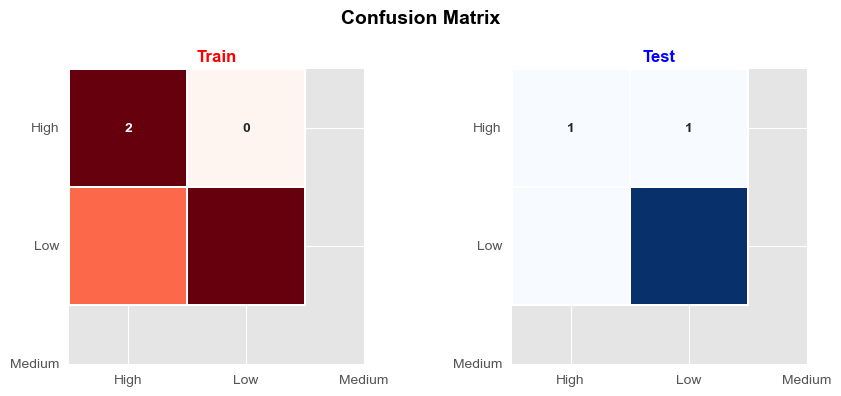

In [40]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_train_encoder, y_pred_train, y_test_encoder, y_pred_test, and le are defined

# Confusion matrices
cf_mx_train = confusion_matrix(y_train_encoder, y_pred_train)
cf_mx_test = confusion_matrix(y_test_encoder, y_pred_test)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# Plot training confusion matrix
sns.heatmap(
    cf_mx_train,
    annot=True,
    annot_kws={'fontsize': 10, 'fontweight': 'bold'},
    fmt='',
    cmap='Reds',
    cbar=False,
    square=True,
    linewidths=1.1,
    yticklabels=le.classes_,
    xticklabels=le.classes_,
    ax=ax[0]
)
ax[0].set_yticklabels(ax[0].get_yticklabels(), rotation=0)
ax[0].set_title("Train", fontsize=12, fontweight='bold', color='red')

# Plot test confusion matrix
sns.heatmap(
    cf_mx_test,
    annot=True,
    annot_kws={'fontsize': 10, 'fontweight': 'bold'},
    fmt='',
    cmap='Blues',
    cbar=False,
    square=True,
    linewidths=1.1,
    yticklabels=le.classes_,
    xticklabels=le.classes_,
    ax=ax[1]
)
ax[1].set_yticklabels(ax[1].get_yticklabels(), rotation=0)
ax[1].set_title("Test", fontsize=12, fontweight='bold', color='blue')

# Overall title and layout adjustments
fig.suptitle("Confusion Matrix", fontsize=14, fontweight='bold', color='black')
fig.tight_layout()
plt.show()


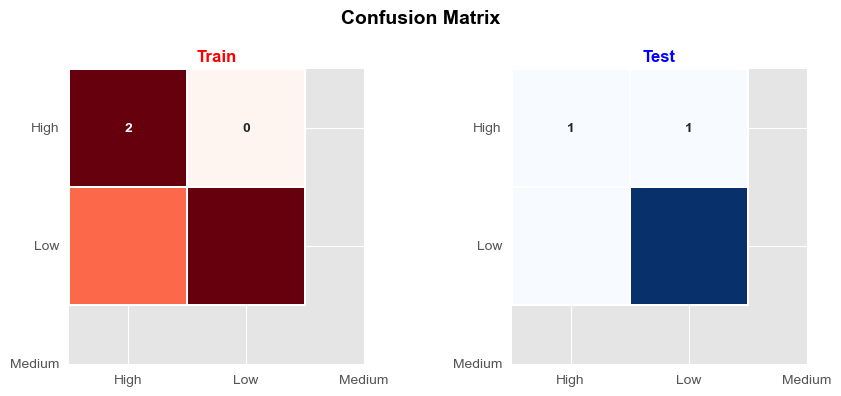

In [41]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is already defined:
# y_train_encoder, y_pred_train, y_test_encoder, y_pred_test, le

# Confusion matrices
cf_mx_train = confusion_matrix(y_train_encoder, y_pred_train)
cf_mx_test = confusion_matrix(y_test_encoder, y_pred_test)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# Plot training confusion matrix
sns.heatmap(
    cf_mx_train,
    annot=True,
    annot_kws={'fontsize': 10, 'fontweight': 'bold'},
    fmt='d',
    cmap='Reds',
    cbar=False,
    square=True,
    linewidths=1.1,
    yticklabels=le.classes_,
    xticklabels=le.classes_,
    ax=ax[0]
)
ax[0].set_yticklabels(ax[0].get_yticklabels(), rotation=0)
ax[0].set_title("Train", fontsize=12, fontweight='bold', color='red')

# Plot test confusion matrix
sns.heatmap(
    cf_mx_test,
    annot=True,
    annot_kws={'fontsize': 10, 'fontweight': 'bold'},
    fmt='d',
    cmap='Blues',
    cbar=False,
    square=True,
    linewidths=1.1,
    yticklabels=le.classes_,
    xticklabels=le.classes_,
    ax=ax[1]
)
ax[1].set_yticklabels(ax[1].get_yticklabels(), rotation=0)
ax[1].set_title("Test", fontsize=12, fontweight='bold', color='blue')

# Overall title and layout adjustments
fig.suptitle("Confusion Matrix", fontsize=14, fontweight='bold', color='black')
fig.tight_layout()
plt.show()


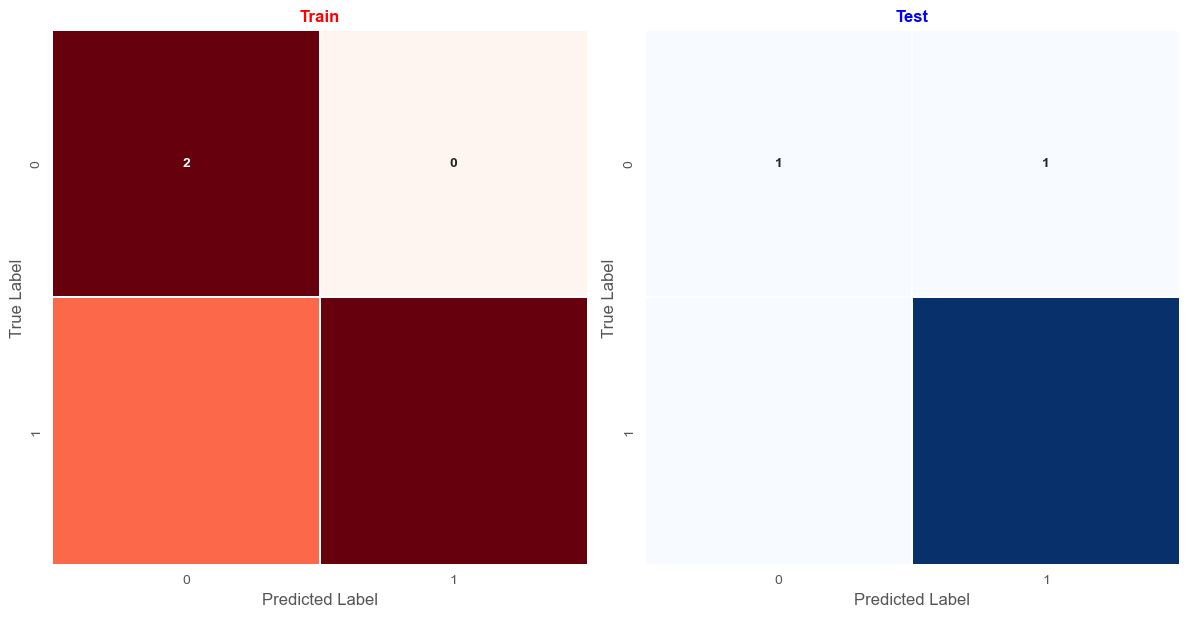

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_train_encoder, y_pred_train, y_test_encoder, y_pred_test are already defined

# Compute confusion matrices
cf_mx_train = confusion_matrix(y_train_encoder, y_pred_train)
cf_mx_test = confusion_matrix(y_test_encoder, y_pred_test)

# Plotting
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  # Adjust figsize as needed

# Plot for training set
sns.heatmap(cf_mx_train,
            annot=True,
            annot_kws={'fontsize': 10, 'fontweight': 'bold'},
            fmt='d',  # Display integer values
            cmap='Reds',
            cbar=False,
            square=True,
            linewidths=1.1,
            yticklabels=True,  # Adjust this based on your class labels
            xticklabels=True,
            ax=ax[0])
ax[0].set_title("Train", fontsize=12, fontweight='bold', color='red')
ax[0].set_xlabel('Predicted Label')
ax[0].set_ylabel('True Label')

# Plot for testing set
sns.heatmap(cf_mx_test,
            annot=True,
            annot_kws={'fontsize': 10, 'fontweight': 'bold'},
            fmt='d',  # Display integer values
            cmap='Blues',
            cbar=False,
            square=True,
            linewidths=1.1,
            yticklabels=True,  # Adjust this based on your class labels
            xticklabels=True,
            ax=ax[1])
ax[1].set_title("Test", fontsize=12, fontweight='bold', color='blue')
ax[1].set_xlabel('Predicted Label')
ax[1].set_ylabel('True Label')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()
